# MA124 Maths by Computer: Assignment 4

## Machine Learning Applied to Bike Sharing Demand Data (20 Marks)

Student number: 2109968

---

In a recent research article published in the journal Computer Communications, authors Sathishkumar V E, Jangwoo Park, and Yongyun Cho sought to predict the "bike count required at each hour for the stable supply of rental bikes"[1]. They employed several regression models, including linear regression. The dataset used in the original study is available [here](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand).
Here I have applied machine learning to a modified version of the original dataset and reported the results. 

We use these deep learning techniques to predict the demand for things such as bike sharing in places like Seoul where it is utilised to enhance mobility and convenience being able to take a bike in and out any system station with ease. Deep learning is used as it gives very accurate predictions and is used to make sure the hourly rental bike demand is being supplied for at a stable rate. However, unless necessary it is not always the best choice as a lot of time and computation cost is required.
In this report we will explore how both Linear Regression and Decision Tree Regression can train data to predict the amount of bikes being rented in a given time period. 

[1] Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. [web link](https://doi.org/10.1016/j.comcom.2020.02.007).

SeoulBikeData_mod.csv has been modified from the original dataset to remove the categorical variables, and to convert dates to months. Months have been coded by number, e.g. 1 = January, etc. Only half the months are included in the modified dataset.


We first of all import all appropriate libraries such as pandas, seaborn, numpy, matplot library and some things from sklearn.

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

We then, using pandas, read SeoulBikeData_mod.csv into a Dataframe named 'SBD'

In [2]:
# read the SeoulBike.csv file to DataFrame iris
SBD = pd.read_csv("SeoulBikeData_mod.csv") 

We then describe this Dataframe so we can esily see all the different readings for each variable such as Rented Bike Count, Humidity, Visibility etc throughout Seoul 

In [3]:
SBD.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
count,4416.000000,4416.00000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000
mean,704.591259,11.50000,13.203986,59.257246,1.653193,1398.641304,4.723958,0.560181,0.139312,0.070879,5.956522
std,637.407244,6.92297,11.529724,20.162981,0.976361,621.560536,12.671445,0.860496,1.145271,0.437416,3.407262
min,0.000000,0.00000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,189.000000,5.75000,4.500000,44.000000,0.900000,853.000000,-3.500000,0.000000,0.000000,0.000000,3.000000
50%,542.000000,11.50000,14.300000,58.000000,1.500000,1621.000000,6.400000,0.010000,0.000000,0.000000,5.000000
75%,1047.000000,17.25000,22.200000,75.000000,2.200000,1999.000000,14.900000,0.910000,0.000000,0.000000,9.000000
max,3298.000000,23.00000,38.000000,98.000000,6.700000,2000.000000,26.800000,3.520000,35.000000,8.800000,11.000000


We then plot a histogram of `Rented Bike Count` as a count. The vertical axis in the article is labelled "frequency", but is the same as the count and shows us how many Bikes are rented in each hour.

We follow this similarly with a boxplot to show more clearly the distribution of `Rented Bike Count`.

From both plots we can see that the data is positively skewed towards the right which means that the median number of Rented Bikes is closer towards the lower quartile meaning this is where the majority of the data is distributed. However, the Boxplot shows clearly that there are many outliers in the higher range of Rented Bike Count Values above the upper quartile.

From the Boxplot and from our presentation of the dataframe we can also see that the median has a value of **542**, the value of the lower whisker/minimum is **0** and the upper whisker (maximum excluding outliers) is around **2400**.



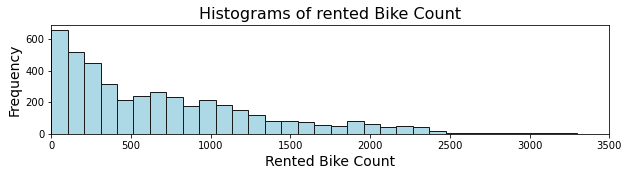

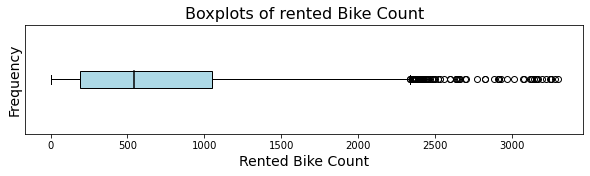

In [4]:
#extract RBC from dataset

y=SBD["Rented Bike Count"]

# Histogram Plots
plt.figure(figsize=(10,2))
plt.hist(y,bins='auto', color= '#ADD9E6' ,edgecolor = (0.1,0.1,0.1))
plt.xlim(0,3500)
plt.xlabel("Rented Bike Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Histograms of rented Bike Count", fontsize=16)

plt.show()

plt.figure(figsize=(10,2))
plt.tick_params(labelleft=False,left=False)
plt.boxplot(y, vert=0, patch_artist=True, medianprops=dict(color='k',linewidth=1.5),boxprops=dict(facecolor='#ADD9E6', color='k') )
plt.xlabel("Rented Bike Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Boxplots of rented Bike Count", fontsize=16)

plt.show()


Here are two violin plots: one showing `Rented Bike Count` for different values of the `Month` and the other showing `Rented Bike Count` for different values of the `Hour`. We use violin plots for a similar reason to our box plots. However, they more accurately mimic the distribution of Rented Bike Count and unlike box plots, aren't misleading as they work in a very visual and intuitive way.

Firstly, we can see there is a lower average Rented Bike Count compared to the other months but has less spread in the use of Rented Bikes throughout this month compared to May, July and September which have a much wider spread and greater maximum Rented Bike Count which could suggest their is inconsistencies with general usage of Rental Bikes within these months.

We can see that Rented Bike Count tends to comparitively spike at $8am$ and $6pm$, likely due to these being rush hours with a generally higher Rented Bike Count spread and average during the hours each side of 6pm.

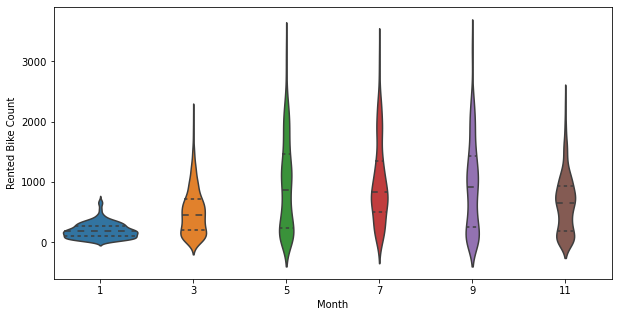

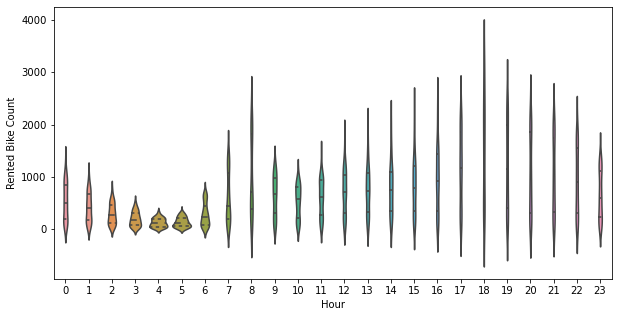

In [5]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Month', y='Rented Bike Count', data=SBD, inner='quartile')

plt.show()

plt.figure(figsize=(10,5))
sns.violinplot(x='Hour', y='Rented Bike Count', data=SBD, inner='quartile')

plt.show()


We next create a new Dataframe `X` containing all the columns except `Rented Bike Count` and use the previously created Series `y` containing only the `Rented Bike Count` column. These are then used as our matrix and target respectively. 

In [6]:
# Remove RBC from data set
X = SBD.drop(["Rented Bike Count"],axis=1)
X.head()
# y is already extracted in first Kernel

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
0,0,-3.2,40,0.5,1358,-14.9,0.0,0.0,0.0,1
1,1,-3.3,41,0.7,2000,-14.7,0.0,0.0,0.0,1
2,2,-3.7,42,0.9,2000,-14.7,0.0,0.0,0.0,1
3,3,-4.0,44,1.0,2000,-14.4,0.0,0.0,0.0,1
4,4,-4.2,53,1.1,1994,-12.3,0.0,0.0,0.0,1


We perform a test-train split to create `X_train`, `X_test`, `y_train` and `y_test`. We use $25\%$ of the data for training and $75\%$ for testing.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# Used 25% of the data for testing

We then follow this with the creation and training of a linear regression model. 

In [8]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X_train, y_train)

LinearRegression()

We then use the trained model to obtain `y_pred`, the prediction on the test data `X_test` and thus form the residual `resid = y_test - y_pred`. 

In [9]:
# Use the model to predict the test data
y_pred = regr.predict(X_test)
resid = y_test - y_pred

Compute and report: Rsquared (R2), the Root Mean Squared Error (RMSE), the Mean Absolute Error (MAE), and the Coefficient of Variation (CV). Despite the fact our data changes (as we choose a random 25% of the data to learn from) we can compare it to the linear model in the cited article to see the difference between how it behaves for only the odd months, like in our data against the results when training from all months, like in the article.
We see that from a few tests of the data the values for this model are very similar to that of the article with some variation that may suggest the errors are slightly larger for our data due to the sample size (amount of months) being less. Therefore, the values for predicted Rented Bike Count are obviously less representative of what the actual values are.

**i.e:**

$0.55$ as the Article value for $R^2$

$427.71$ as the Article value  for $RMSE$

$322.32$ as the Article value  for $MAE$

$61.03$ as the Article value  for $CV\%$


In [10]:
# using scikit-learn to compute r2 (note that r2_score was imported above)
r2 = r2_score(y_test, y_pred)
print("Our value for Rsquared is:",r2)

RMSE = np.sqrt(np.mean(resid**2))
print("Our value for Root Mean Squared Error is:",RMSE)

MAE = np.mean(np.abs(resid))
print("Our value for Mean Absolute Error is:",MAE)

CV = 100 * RMSE/np.mean(y_test)
print("Our Coefficient of Variation is",round(CV),"%")

Our value for Rsquared is: 0.4846879445696535
Our value for Root Mean Squared Error is: 452.1987660991387
Our value for Mean Absolute Error is: 332.2591083491796
Our Coefficient of Variation is 66 %


Firstly we plot histograms of `y_test` and of `y_pred` as counts.
We see that the using our model we predicted Bikecount to be quite normally distributed with very little skew and some negative values which is a flaw to our machine learning algorithm. However, the actual values for our test data were positively skewed meaning most of the Rented Bike Count occurred at values under 400.

Secondly, we have a scatter plot of `resid` as a function of `y_test`. Similarly to Fig. 9 in the article, we see there is a positive correlation between the residual error (Difference between actual and predicted) and the predicted Bike Count.

Next we have a scatter plot of `resid` as a function of `X_test['Month']`. We use a colormap to indicate the absolute value of `resid`. This shows that for our test there is the greatest residual error in distribution in September followed by November and the least residual error in January. 

Finally we have a scatter plot of `resid` as a function of `X_test['Rainfall(mm)']`. We usea colormap to indicate the absolute value of `resid`. From the plot we can see that the residual error of Bike Count is closer to 0 when it is raining whereas when it isn't there is a large dispersion in residual values.

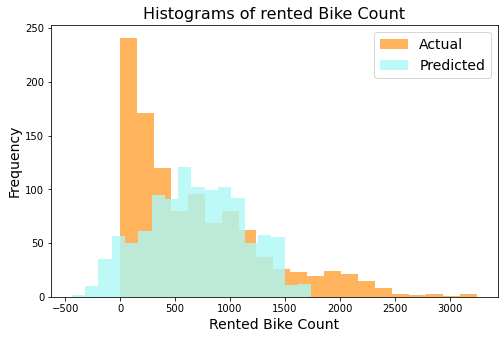

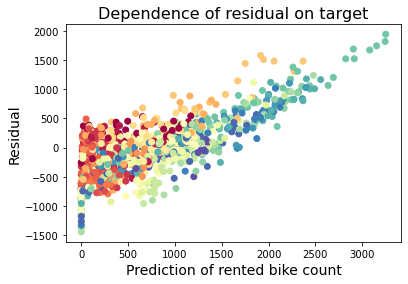

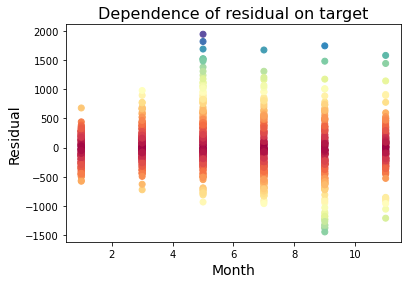

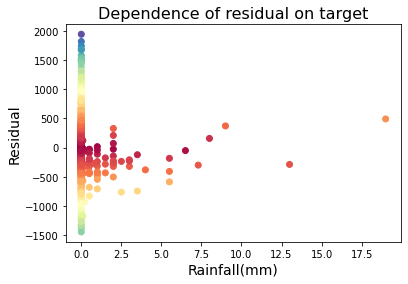

In [11]:
plt.figure(figsize=(8,5))
plt.hist(y_test, bins='auto', color= '#FFB35C', label='Actual')
plt.hist(y_pred, bins='auto', color= '#ADF8F6' , alpha=0.8, label='Predicted' )
plt.legend(fontsize=14)
plt.xlabel("Rented Bike Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Histograms of rented Bike Count", fontsize=16)

plt.show()

H = X_test["Hour"]


plt.scatter(y_test, resid, c = H, cmap = 'Spectral')
plt.xlabel("Prediction of rented bike count", fontsize="14")
plt.ylabel("Residual", fontsize="14")
plt.title("Dependence of residual on target", fontsize="16")
plt.show()

R= abs(resid)

plt.scatter(X_test['Month'], resid, c = R, cmap = 'Spectral')
plt.xlabel("Month", fontsize="14")
plt.ylabel("Residual", fontsize="14")
plt.title("Dependence of residual on target", fontsize="16")
plt.show()

R= abs(resid)

plt.scatter(X_test['Rainfall(mm)'], resid, c = R, cmap = 'Spectral')
plt.xlabel("Rainfall(mm)", fontsize="14")
plt.ylabel("Residual", fontsize="14")
plt.title("Dependence of residual on target", fontsize="16")
plt.show()

As seen in the article, most of the results involve "Trees". There are several types of trees used in machine learning. Here we use Sklearn which provides a DecisionTreeRegressor. 
We have created and trained a DecisionTreeRegressor to predict test data.

And we then report: **Rsquared (R2)**, the **Root Mean Squared Error (RMSE)**, the **Mean Absolute Error (MAE)**, and the **Coefficient of Variation (CV)**

It is very clear that overall the errors are much less for the Decision Tree Regressor in comparison to the Linear Model and the Rsquared value is higher for this model. This seems to suggest there is more accuracy when using the Tree Regressor to train the data.



Our value for Rsquared is: 0.6995813520010382
Our value for Root Mean Squared Error is: 345.26906228504765
Our value for Mean Average Error is: 217.36541077181556
Our Coefficient of Variation is: 50 %


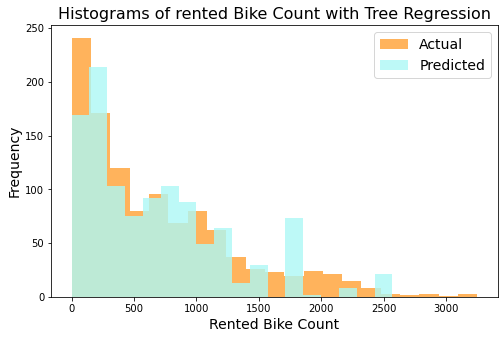

In [12]:
regr1 = DecisionTreeRegressor(max_depth=8)
regr1.fit(X_train, y_train)

# Use the model to predict the test data
y_pred1 = regr1.predict(X_test)
resid1 = y_test - y_pred1

# using scikit-learn to compute r2 (note that r2_score was imported above)
r2_tree = r2_score(y_test, y_pred1)
print("Our value for Rsquared is:",r2_tree)

RMSE_tree = np.sqrt(np.mean(resid1**2))
print("Our value for Root Mean Squared Error is:",RMSE_tree)

MAE_tree = np.mean(np.abs(resid1))
print("Our value for Mean Average Error is:",MAE_tree)

CV_tree = 100 * RMSE_tree/np.mean(y_test)
print("Our Coefficient of Variation is:",round(CV_tree),"%")

plt.figure(figsize=(8,5))
plt.hist(y_test, bins='auto', color= '#FFB35C', label='Actual')
plt.hist(y_pred1, bins='auto', color= '#ADF8F6' , alpha=0.8, label='Predicted' )
plt.legend(fontsize=14)
plt.xlabel("Rented Bike Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Histograms of rented Bike Count with Tree Regression", fontsize=16)

plt.show()

**Conclusion**

We conclude that our linear model is very similar to that of the article and trains our data to a certain degree of accuracy with an RSquared value for our test set that varies around $45\%$. However we also see that the use of a Decison Tree Regressor is more accurate at around $65\%$ depending on the $25\%$ of data that is being trained in each sample. However, in comparison to the analysis carried out in $Gradient$ $Boosting$ $Machine$ from the article, which had an RSquared value of $0.92$ for their training set. Thus this is a much more effective Regressor and should be used to accurately identify the most significant predictors and the relationships between them.